# Module 10: Dimensionality Reduction
1. Demonstrate How you will  Identify Multicollinearity R/Python
2. Demonstrate HOW you’ll apply PRINCIPAL COMPONENTS ANALYSIS Using R/Python



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import zipfile

with zipfile.ZipFile('Downloads\\Iris.zip', 'r') as zip_ref:
    zip_ref.extractall('extract_folder')

In [4]:
df = pd.read_csv('extract_folder/Iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.drop(['Id'],axis=1,inplace=True)

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

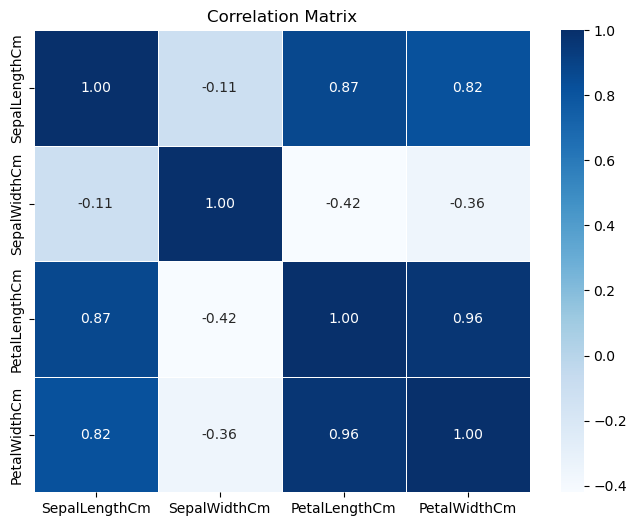

In [34]:
#correlation
correlation_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Features with high correlation indicate multicollinearity

In [9]:
# Demonstrating PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
X = df.drop('Species', axis=1)  
y = df['Species'] 

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [24]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

In [25]:
X_pca

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

In [30]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [22]:
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Species'] = y

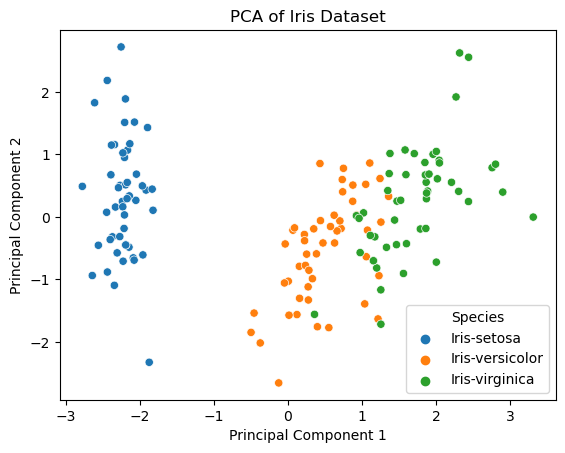

In [23]:
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Species', data=df_pca)
plt.title('PCA of Iris Dataset')
plt.show()